# 17장 비모수 통계분석

## 17.2 적합도 검정
### 분석 시나리오 - ① RUN 검정

A 쇼핑은 본점의 1층 화장품 매장 중 S 브랜드의 신제품 런칭 이벤트를 지원하기 위하여 상품권 1만원권을 매장 방문고객에게 배포하였다. 단, 상품권 배포 조건은 A 쇼핑몰의 멤버십을 소지하고 있는 고객이었다. 매장 오픈 후 최초 20명의 방문이력을 조사한 결과 아래의 순서로 맴버십을 소지한 사람 (1)과 소지하지 않은 사람 (0)이 방문하였다. A쇼핑몰의 CRM 팀에서는 이러한 마케팅 행사가 공정하게 이루어졌는지를 판단하기 위해 런 검정을 실시하고자 한다. 

#### H0 (귀무가설)= 멤버십 소지 고객과 비소지 고객의 방문은 무작위로 이루어졌다. 
#### H1 (연구가설)= 멤버십 소지 고객과 비소지 고객의 방문은 무작위로 이루어지지 않았다.

In [1]:
#1. 모듈 및 데이터 탑재
from statsmodels.sandbox.stats.runs import Runs
import numpy as np
x = [1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0]
x = np.array(x)

#2. RUN 검정 분석
Runs(x).runs_test()

(-1.8277470669267506, 0.06758752074917526)

### 분석 시나리오 - ② Kolmogorov-Smirnov 검정 (단일표본)

T 여행사는 최근 개발한 북극탐험 여행 패키지 상품에 대한 만족도를 조사하기 위해 40명의 참가고객들을 대상으로 설문을 응답 받았다. 100점 만점으로 평가한 고객만족도 점수는 아래와 같다. T 여행사는 다양한 마케팅 가설검증을 하기에 앞서 우선 이 고객설문 결과가 기존의 고객만족도 설문 결과와 같이 정규분포성을 띄는지 확인하기 위해 Kolmogorov-Smirnov 검정을 수행해보고자 한다.


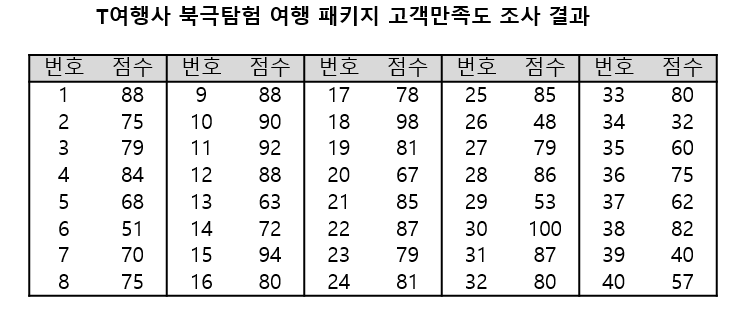

이를 위해 다음과 같이 가설을 수립할 수 있다.
#### H0 (귀무가설)= T여행사 고객들의 고객만족도점수는 정규분포를 따른다.
#### H1 (연구가설)= T여행사 고객들의 고객만족도점수는 정규분포를 따르지 않는다.

In [2]:
#1. 모듈 및 데이터 탑재
from statsmodels.stats.diagnostic import kstest_normal
import numpy as np 
x = [88,75,79,84,68,51,70,75,88,90,92,88,63,72,94,80,78,98,81,67,85,87,79,81,85,48,79,86,53,100,87,80,80,32,60,75,62,82,40,57]
x = np.array(x)

#2. Kolmogorov-Smirnov 검정 분석
kstest_normal(x, dist='norm')


(0.16508249090030575, 0.007697422359967707)

## 17.3 동질성 검정
### 분석 시나리오 - ① Wilcoxon 부호-순위 검정

전자회사 C사는 기존의 물류 알고리즘보다 개선되었다고 알려진 새로운 물류 경로 최적화 알고리즘을 도입해 상품의 배송시간을 단축하고자 한다. 이에 전국 7개의 물류센터에 실험적으로 적용해보고 실제로 얼마나 더 나은 성과를 보이는지 검증해보고자 한다. 전국 7개의 물류센터에서 새로운 알고리즘의 적용 전 평균 배송시간과 적용 후의 평균 배송시간은 다음과 같다. 

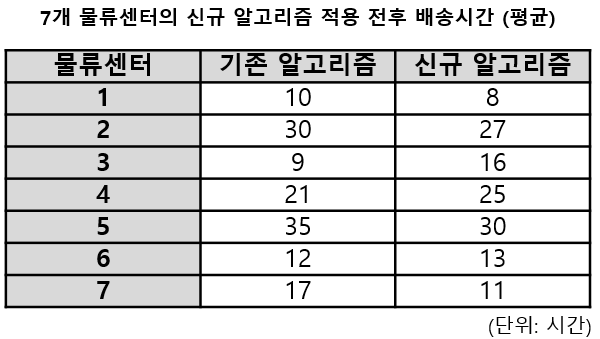

이를 위해 다음과 같이 가설을 수립할 수 있다.
#### H0 (귀무가설)= 기존 물류 알고리즘과 신규 알고리즘간을 통한 평균 배송시간은 차이가 없다.
#### H1 (연구가설)= 기존 물류 알고리즘과 신규 알고리즘간을 통한 평균 배송시간은 차이가 있다.

In [3]:
#1. 모듈 및 데이터 탑재
from scipy.stats import wilcoxon 
x = [10,30,9,21,35,12,17]
y = [8,27,16,25,30,13,11] 

#2. 부호 순위 검정 분석
wilcoxon(x,y)


C:\Users\Seungwoo\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


WilcoxonResult(statistic=12.0, pvalue=0.7353166906373405)

### 분석 시나리오 - ② Mann-Whitney U 검정

V반도체 회사는 A공장과 B공장 2개의 공장에서 반도체를 생산하고 있다. 두 공장에서의 생산효율성을 비교하기 위하여 생산되는 반도체의 생산량을 5일 간 조사한 결과는 아래 표와 같다. 2개 공장의 생산 효율성에 차이가 있는지를 Mann-Whitney U 검정을 통해 살펴보자. 이에 대한 가설은 다음과 같다.

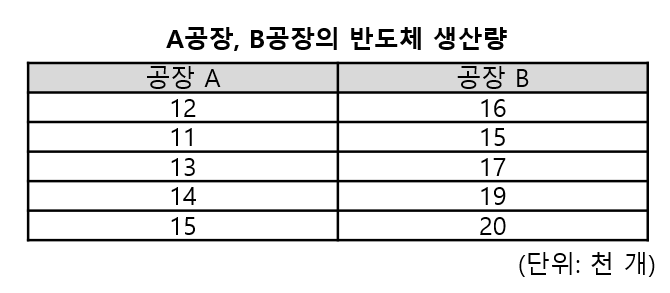

이를 위해 다음과 같이 가설을 수립할 수 있다.
#### H0 (귀무가설)= 공장 A와 공장B의 생산효율성은 동일하다. 
#### H1 (연구가설)= 공장 A와 공장B의 생산효율성은 다르다.

In [4]:
#1. 모듈 및 데이터 탑재
import pandas as pd
from scipy.stats import mannwhitneyu
x = [12, 11, 13, 14, 15]
y = [16, 15, 17, 19, 20]

#2. Mann-Whitney 검정 분석
print(mannwhitneyu(x,y))

#3. 생산량 평균 순위 출력
xy = pd.DataFrame(x+y)
xy['생산량 순위'] = xy.rank(ascending=False)
xy['공장이름'] = ['A','A','A','A','A','B','B','B','B','B']
xy.groupby('공장이름').mean()


MannwhitneyuResult(statistic=0.5, pvalue=0.007985348176890053)


0  생산량 순위
공장이름              
A     13.0     7.9
B     17.4     3.1

### 분석 시나리오 - ③ Kruskal-Wallis H 검정

Q 제철기업은 철근을 생산하는데 있어 3개의 공장을 운영하고 있다. 현재 철근 생산량이 목표에 미치지 못하고 있어 생산량이 가장 낮은 공장을 찾아 공장 설비 등을 보강시켜 생산량을 더 높일 계획이다. 아래 표는 3개의 공장의 월별 철근 생산량을 나타낸다. Kruskal-Wallis H검정을 통해 각 공장별 생산량의 차이가 있는지 검정해보자. 이를 위한 가설은 다음과 같다. 

#### H0 (귀무가설)= 3개의 공장의 철근 생산량은 모두 동일하다. 
#### H1 (연구가설)= 3개의 공장의 철근 생산량은 모두 동일하지는 않다.

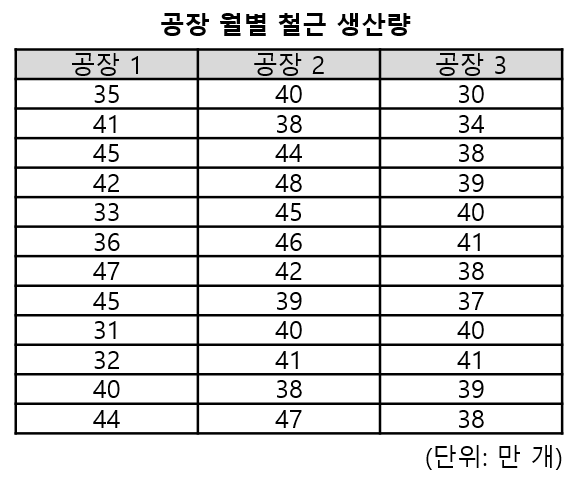

In [1]:
#1. 모듈 및 함수 불러오기
import pandas as pd
from scipy.stats import kruskal 
a = [35,41,45,42,33,36,47,45,31,32,40,44]
b = [40,38,44,48,45,46,42,39,40,41,38,47]
c = [30,34,38,39,40,41,38,37,40,41,39,38] 

#2. Kruskal-Wallis H 검정 분석
print(kruskal(a,b,c))

#3. 생산량 평균 순위 출력
abc = pd.DataFrame(a+b+c)
abc['생산량순위'] = abc.rank(ascending=False)
abc['공장이름'] = ''
abc['공장이름'][0:12] = 1
abc['공장이름'][12:24] = 2
abc['공장이름'][24:36] = 3
abc.groupby('공장이름').mean()


KruskalResult(statistic=6.047476974964328, pvalue=0.04861911622342764)


C:\Users\Seungwoo\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\Seungwoo\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\Seungwoo\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0  생산량순위
공장이름                  
1     39.250000   19.0
2     42.333333   13.0
3     37.916667   23.5

### 분석 시나리오 - ④ Friedman 검정

A쇼핑 본사에서는 멤버십 VIP 고객들을 대상으로 새로운 혜택을 제공하고자 한다. 샘플증정, 포인트 추가, 무료배송, 할인쿠폰 등 4가지 혜택에 대한 5개 지역별 고객들에 대한 사전 선호도 조사를 실시한 결과 지역별 서비스에 대한 서열은 아래 표와 같이 정리되었다. 혜택 별 고객 선호도에 차이가 있는지를 Friedman 검정을 통해 알아보자. 이에 대한 가설은 다음과 같다.

#### H0 (귀무가설)= 혜택별 고객의 선호도 평가에 차이는 없다.
#### H1 (연구가설)= 혜택별 고객의 선호도 평가에 차이가 있다.

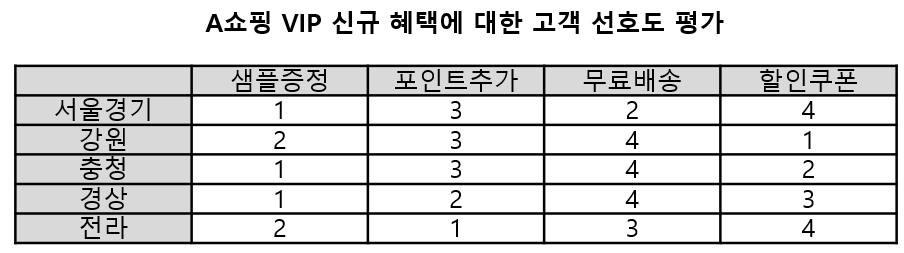

In [6]:
#1. 모듈 및 데이터 탑재
from scipy.stats import friedmanchisquare 
a = [1,2,1,1,2]
b = [3,3,3,2,1]
c = [2,4,4,4,3]
d = [4,1,2,3,4] 

#2. Friedman 검정 분석 
friedmanchisquare(a,b,c,d)


FriedmanchisquareResult(statistic=6.359999999999999, pvalue=0.09535032301698126)

## 17.4 상관성 검정
### 분석 시나리오

타 홈쇼핑에 비해 뒤늦게 출발한 H 홈쇼핑에서는 최근 주력 판매 품목이었던 의류/패션 상품의 매출이 급락하여 시급한 대책마련이 필요하게 되었다. 패션을 포함한 소비재 상품을 취급하는 제2상품본부장은 최근 의류 상품의 매출부진이 비교적 값 비싼 상품을 판매했기 때문이라고 지적하였고, CRM 팀에서는 이러한 지적이 사실인지 판단하기 위해 최근 판매된 5개 의류 브랜드의 가격과 판매량을 바탕으로 Kendall의 서열상관 계수를 구하기로 하였다. 아래의 표에서는 5개 브랜드에 대한 판매 가격과 실제 판매량에 대해 서열척도로 변환하여 나타낸 표이다. 

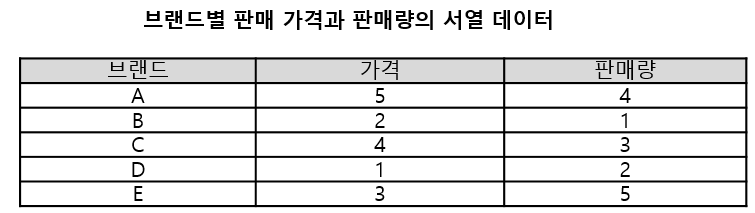

이를 위한 가설설정은 다음과 같다.
#### H0 (귀무가설)= H홈쇼핑의 의류브랜드 가격 서열과 판매량 서열은 연관성이 없다. 
#### H1 (연구가설)= H홈쇼핑의 의류브랜드 가격 서열과 판매량 서열은 연관성이 있다.

In [8]:
#1. 모듈 및 함수 불러오기
from scipy.stats import kendalltau 
x = [5,2,4,1,3]
y = [4,1,3,2,5] 

#2. Kendall 검정 분석 결과 출력
kendalltau(x,y)

KendalltauResult(correlation=0.39999999999999997, pvalue=0.48333333333333334)